In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
%load_ext autoreload
%autoreload 2
from ieee80211phy.util import *
from ieee80211phy.receiver import *
from ieee80211phy.preamble import *
from ieee80211phy.ofdm import *
from ieee80211phy.transmitter import *
from ieee80211phy.modulation import *
from ieee80211phy.conv_coding import *
from ieee80211phy.signal_field import *

import warnings
warnings.filterwarnings("ignore")

INFO:ieee80211phy.transmitter:Package 100 bytes, 23 OFDM symbols (6 padding bits added)
	 data_rate=9, modulation=BPSK, coding_rate=3/4


00100000010000000000000001110100000000000000011000010000101100111110110001100101000000000000010001101011100000000011110010001111000000000000011000010000101101011101110011110101000000000000000001010010111101101001111000110100000001000100011001001110100101101110011000010110001011100000010011001110000011101000011001001110110101100000010011110110011001100000010000100110100101100110111010010110011101101001011000101110100111100011010001010000001000101000011010101110111001100001011000101110101001100100111000000100111101100110011000000100101000100011011010011110110011101001011010101110101101100011010001010000011000101001011001001110101001101011010010010110011101101100111010010110010011101010011000100110000001001110111010100110000001000010111001001110101001101000011011100110110011001000010001101101


<IPython.core.display.Javascript object>


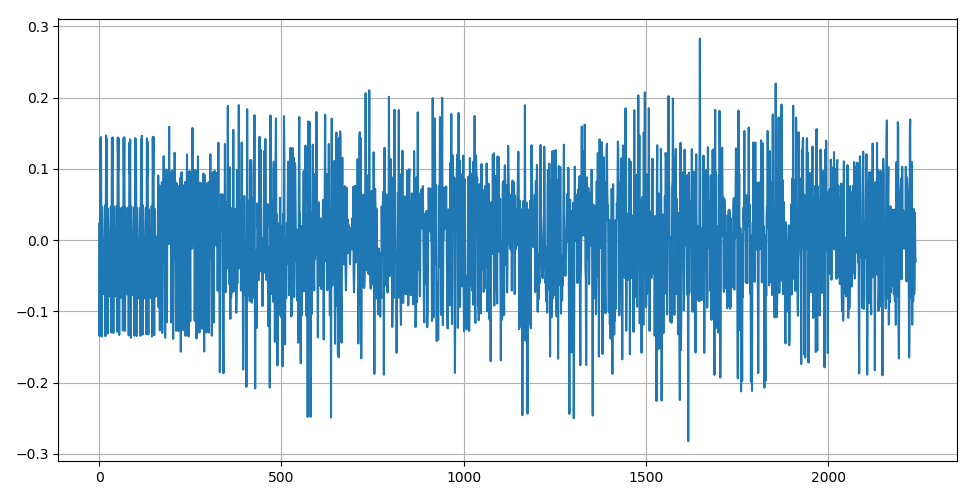

DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
DEBUG:matplotlib.axes._base:update_title_pos


In [2]:
input = '0x0402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B6'
input = flip_byte_endian(hex_to_bitstr(input))
print(input)
iq = transmitter(input, data_rate=9)
iq = awgn(iq, 30)
plt.figure(figsize=(9.75,5))
plt.plot(iq)
plt.tight_layout()
plt.grid()

<IPython.core.display.Javascript object>


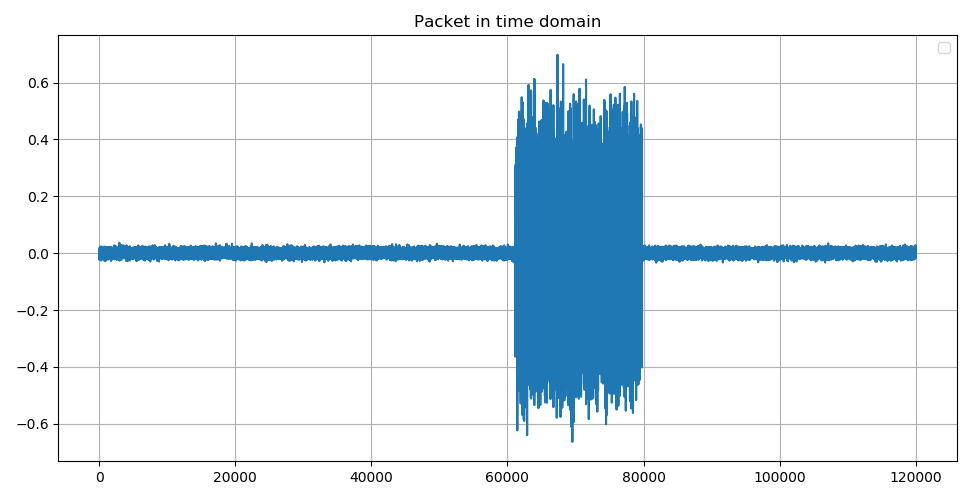

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/usr/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.


In [3]:
# iq = np.load('/home/gaspar/git/ieee80211phy/data/limemini_lime_air.npy')

iq = np.load('/home/gaspar/git/ieee80211phy/data/limemini_air.npy')
plt.figure(figsize=(9.75, 5))

plt.title('Packet in time domain')
plt.plot(iq)

plt.grid()
plt.legend()
plt.tight_layout()

INFO:ieee80211phy.receiver:Found packets at: [61310]


<IPython.core.display.Javascript object>


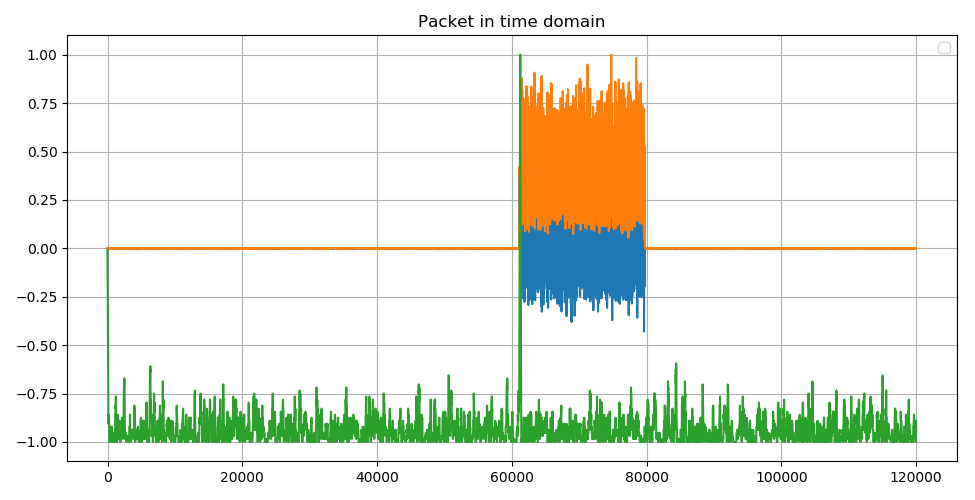

DEBUG:matplotlib.axes._base:update_title_pos


<IPython.core.display.Javascript object>


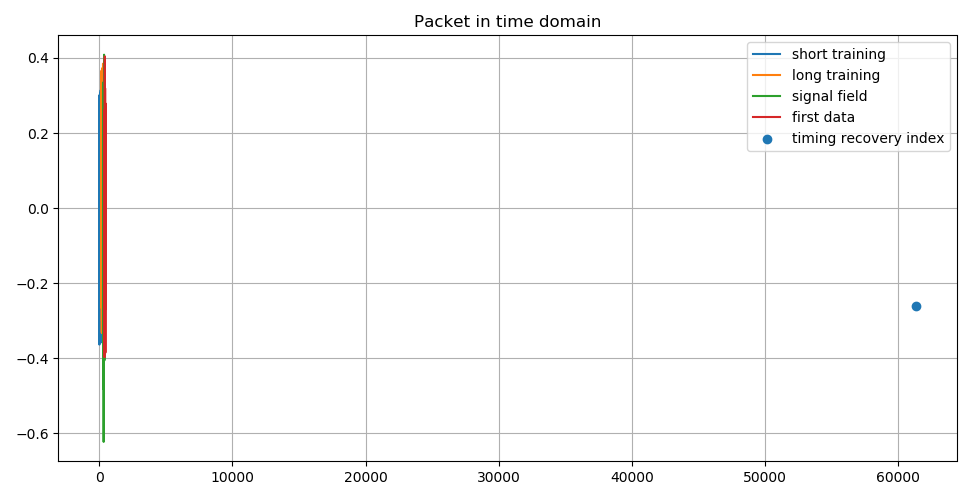

DEBUG:matplotlib.axes._base:update_title_pos


In [4]:
i = packet_detector(iq)

plt.figure(figsize=(9.75, 5))
plt.title('Packet in time domain')
plt.plot(Trace['detector_autocorr'] / Trace['detector_power'].max())
plt.plot(Trace['detector_power'] / Trace['detector_power'].max())
plt.plot(Trace['detector_ratio'])

plt.grid()
plt.legend()
plt.tight_layout()

i = i[0]
plot_packet_time_domain(iq, i)

INFO:ieee80211phy.conv_coding:Decoded 24 bits, score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 4095 bytes, 228 OFDM symbols
	 data_rate=36, modulation=16-QAM, coding_rate=3/4
INFO:ieee80211phy.conv_coding:Decoded 32832 bits, score=0, rate=3/4


<IPython.core.display.Javascript object>


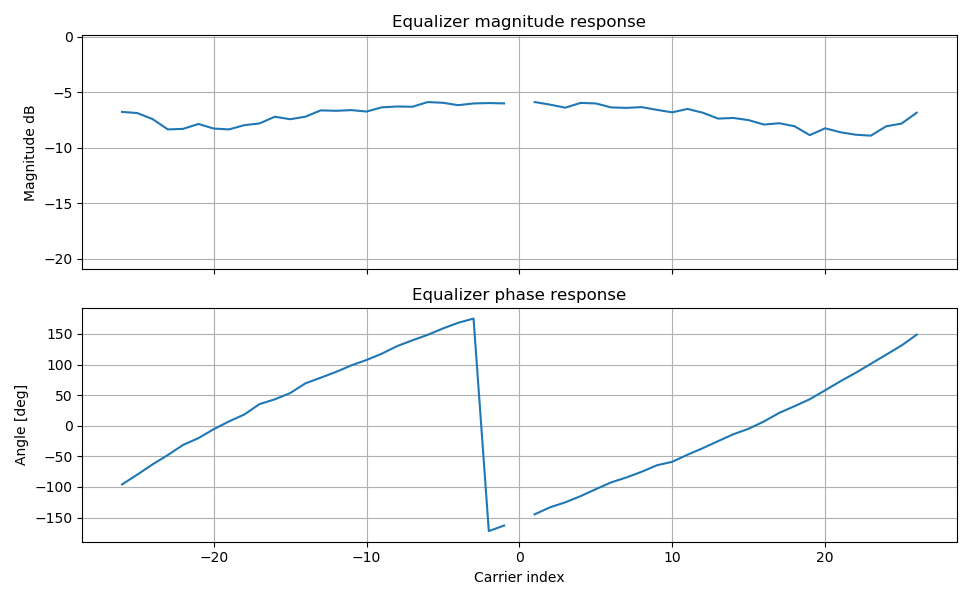

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


<IPython.core.display.Javascript object>


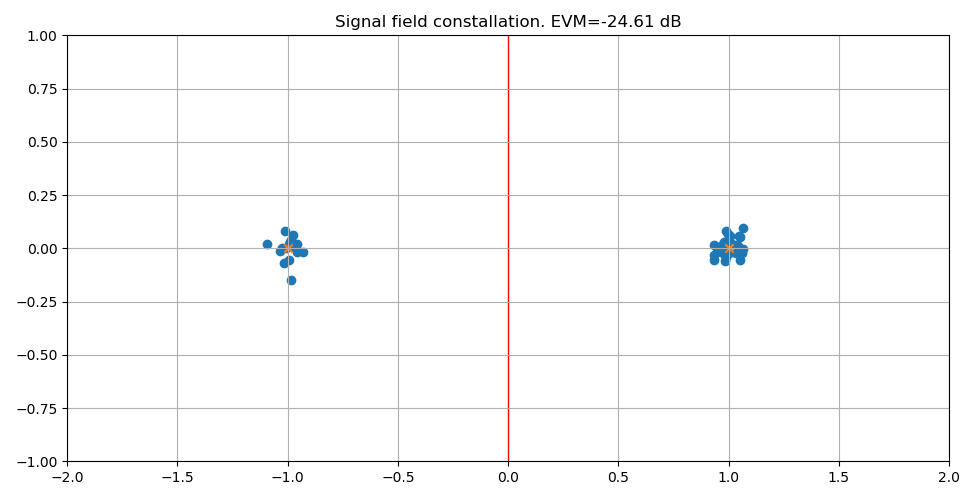

DEBUG:matplotlib.axes._base:update_title_pos


<IPython.core.display.Javascript object>


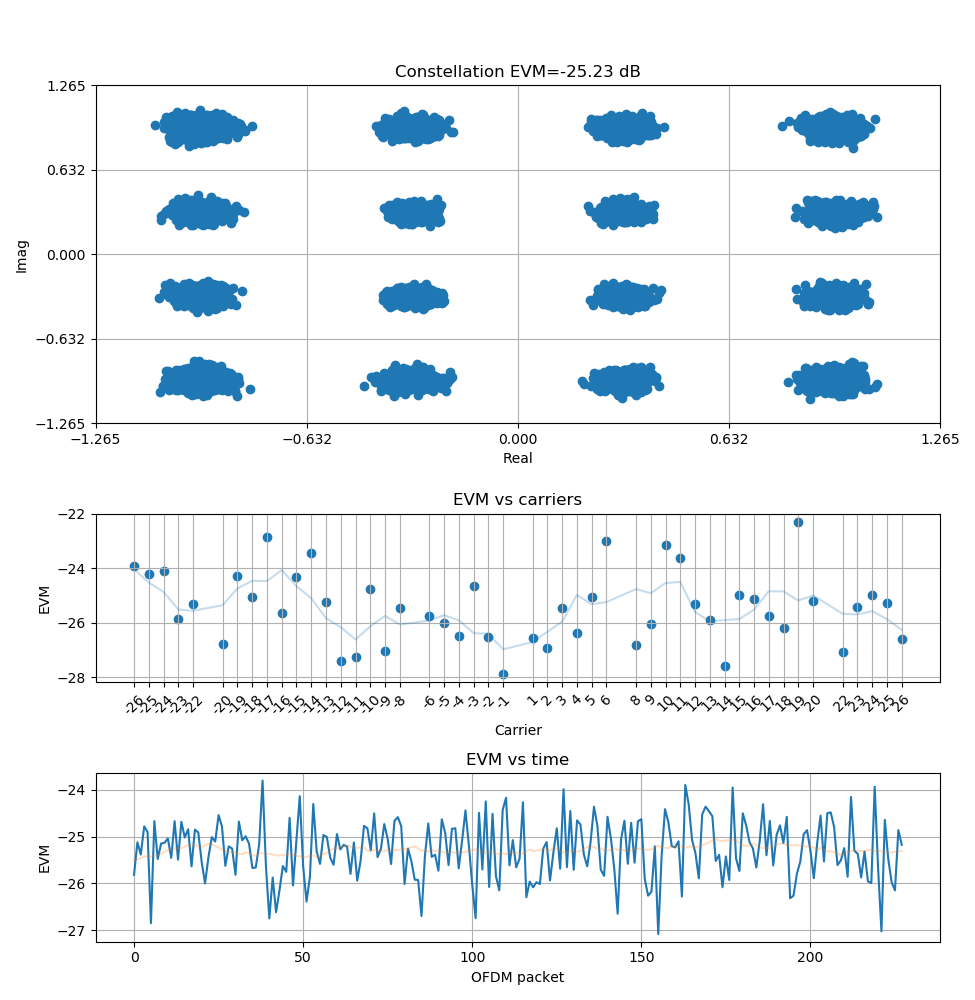

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


In [5]:
bits = receiver(iq[i-2:])
bits
plot_channel_estimate(Trace['equalizer'])
plot_signal_field_constellation(Trace['signal_symbols'])
# np.array(Trace['data_symbols']).real
plot_rx(*Trace['data_symbols'])

In [6]:
# 00100000010000000000000001110100000000000000011000010000101100111110110001100101000000000000010001101011100000000011110010001111000000000000011000010000101101011101110011110101000000000000000001010010111101101001111000110100000001000100011001001110100101101110011000010110001011100000010011001110000011101000011001001110110101100000010011110110011001100000010000100110100101100110111010010110011101101001011000101110100111100011010001010000001000101000011010101110111001100001011000101110101001100100111000000100111101100110011000000100101000100011011010011110110011101001011010101110101101100011010001010000011000101001011001001110101001101011010010010110011101101100111010010110010011101010011000100110000001001110111010100110000001000010111001001110101001101000011011100110110011001000010001101101
# 00100000010000000000000001110100000000000000011000010000101100111110110001100101000000000000010001101011100000000011110010001111000000000000011000010000101101011101110011110101000000000000000001010010111101101001111000110100000001000100011001001110100101101110011000010110001011100000010011001110000011101000011001001110110101100000010011110110011001100000010000100110100101100110111010010110011101101001011000101110100111100011010001010000001000101000011010101110111001100001011000101110101001100100111000000100111101100110011000000100101000100011011010011110110011101001011010101110101101100011010001010000011000101001011001001110101001101011010010010110011101101100111010010110010011101010011000100110000001001110111010100110000001000010111001001110101001101000011011100110110011001000010001101101